In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
# Load the dataset
insurance_data = pd.read_csv("C:/Users/abbas/OneDrive/Desktop/Practice Datasets/Desjardins Project/Dataset.csv")


In [3]:
# Select relevant columns
categorical_vars = ["driver_gender", "current_add_same_as_vehicle_reg", 
                     "historical_legal_issues", "is_individual_policy_holder",
                     "vehicle_registration_address_verified"]
numeric_vars = ["premium_amount","avg_income_by_zip_code","num_vehicle_changes",
                 "reported_income", "population_density", "infractions", "credit_score", 
                 "anomalies_payment_history","crime_rate","num_address_changes"]

selected_data = insurance_data[categorical_vars + numeric_vars]


In [4]:
# Handle missing values
selected_data['vehicle_registration_address_verified'].fillna('unconfirmed', inplace=True)

C:\Users\abbas\AppData\Local\Temp\ipykernel_14264\1988804255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['vehicle_registration_address_verified'].fillna('unconfirmed', inplace=True)


In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
for var in categorical_vars:
    selected_data[var] = label_encoder.fit_transform(selected_data[var])

C:\Users\abbas\AppData\Local\Temp\ipykernel_14264\619018729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[var] = label_encoder.fit_transform(selected_data[var])
C:\Users\abbas\AppData\Local\Temp\ipykernel_14264\619018729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[var] = label_encoder.fit_transform(selected_data[var])
C:\Users\abbas\AppData\Local\Temp\ipykernel_14264\619018729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [6]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
selected_data['isolation_forest_outlier'] = isolation_forest.fit_predict(selected_data[numeric_vars])

C:\Users\abbas\AppData\Local\Temp\ipykernel_14264\442017045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['isolation_forest_outlier'] = isolation_forest.fit_predict(selected_data[numeric_vars])


In [7]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
selected_data['kmeans_cluster'] = kmeans.fit_predict(selected_data[numeric_vars])

C:\Users\abbas\AppData\Local\Temp\ipykernel_14264\2007820165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['kmeans_cluster'] = kmeans.fit_predict(selected_data[numeric_vars])


In [8]:
# Display the resulting DataFrame with cluster and outlier labels
print(selected_data.head())

   driver_gender  current_add_same_as_vehicle_reg  historical_legal_issues  \
0              5                                0                        0   
1              4                                0                        1   
2              4                                1                        1   
3              5                                0                        1   
4              5                                0                        0   

   is_individual_policy_holder  vehicle_registration_address_verified  \
0                            0                                      0   
1                            0                                      0   
2                            1                                      1   
3                            1                                      0   
4                            0                                      1   

   premium_amount  avg_income_by_zip_code  num_vehicle_changes  \
0          536.07         

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

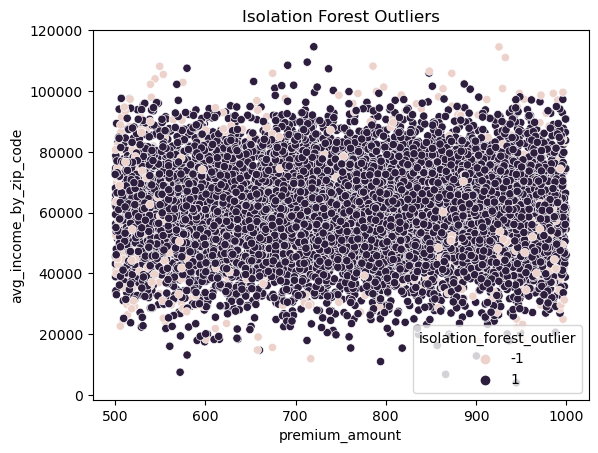

In [10]:
# Plotting Isolation Forest outliers
sns.scatterplot(x='premium_amount', y='avg_income_by_zip_code', hue='isolation_forest_outlier', data=selected_data)
plt.title('Isolation Forest Outliers')
plt.show()

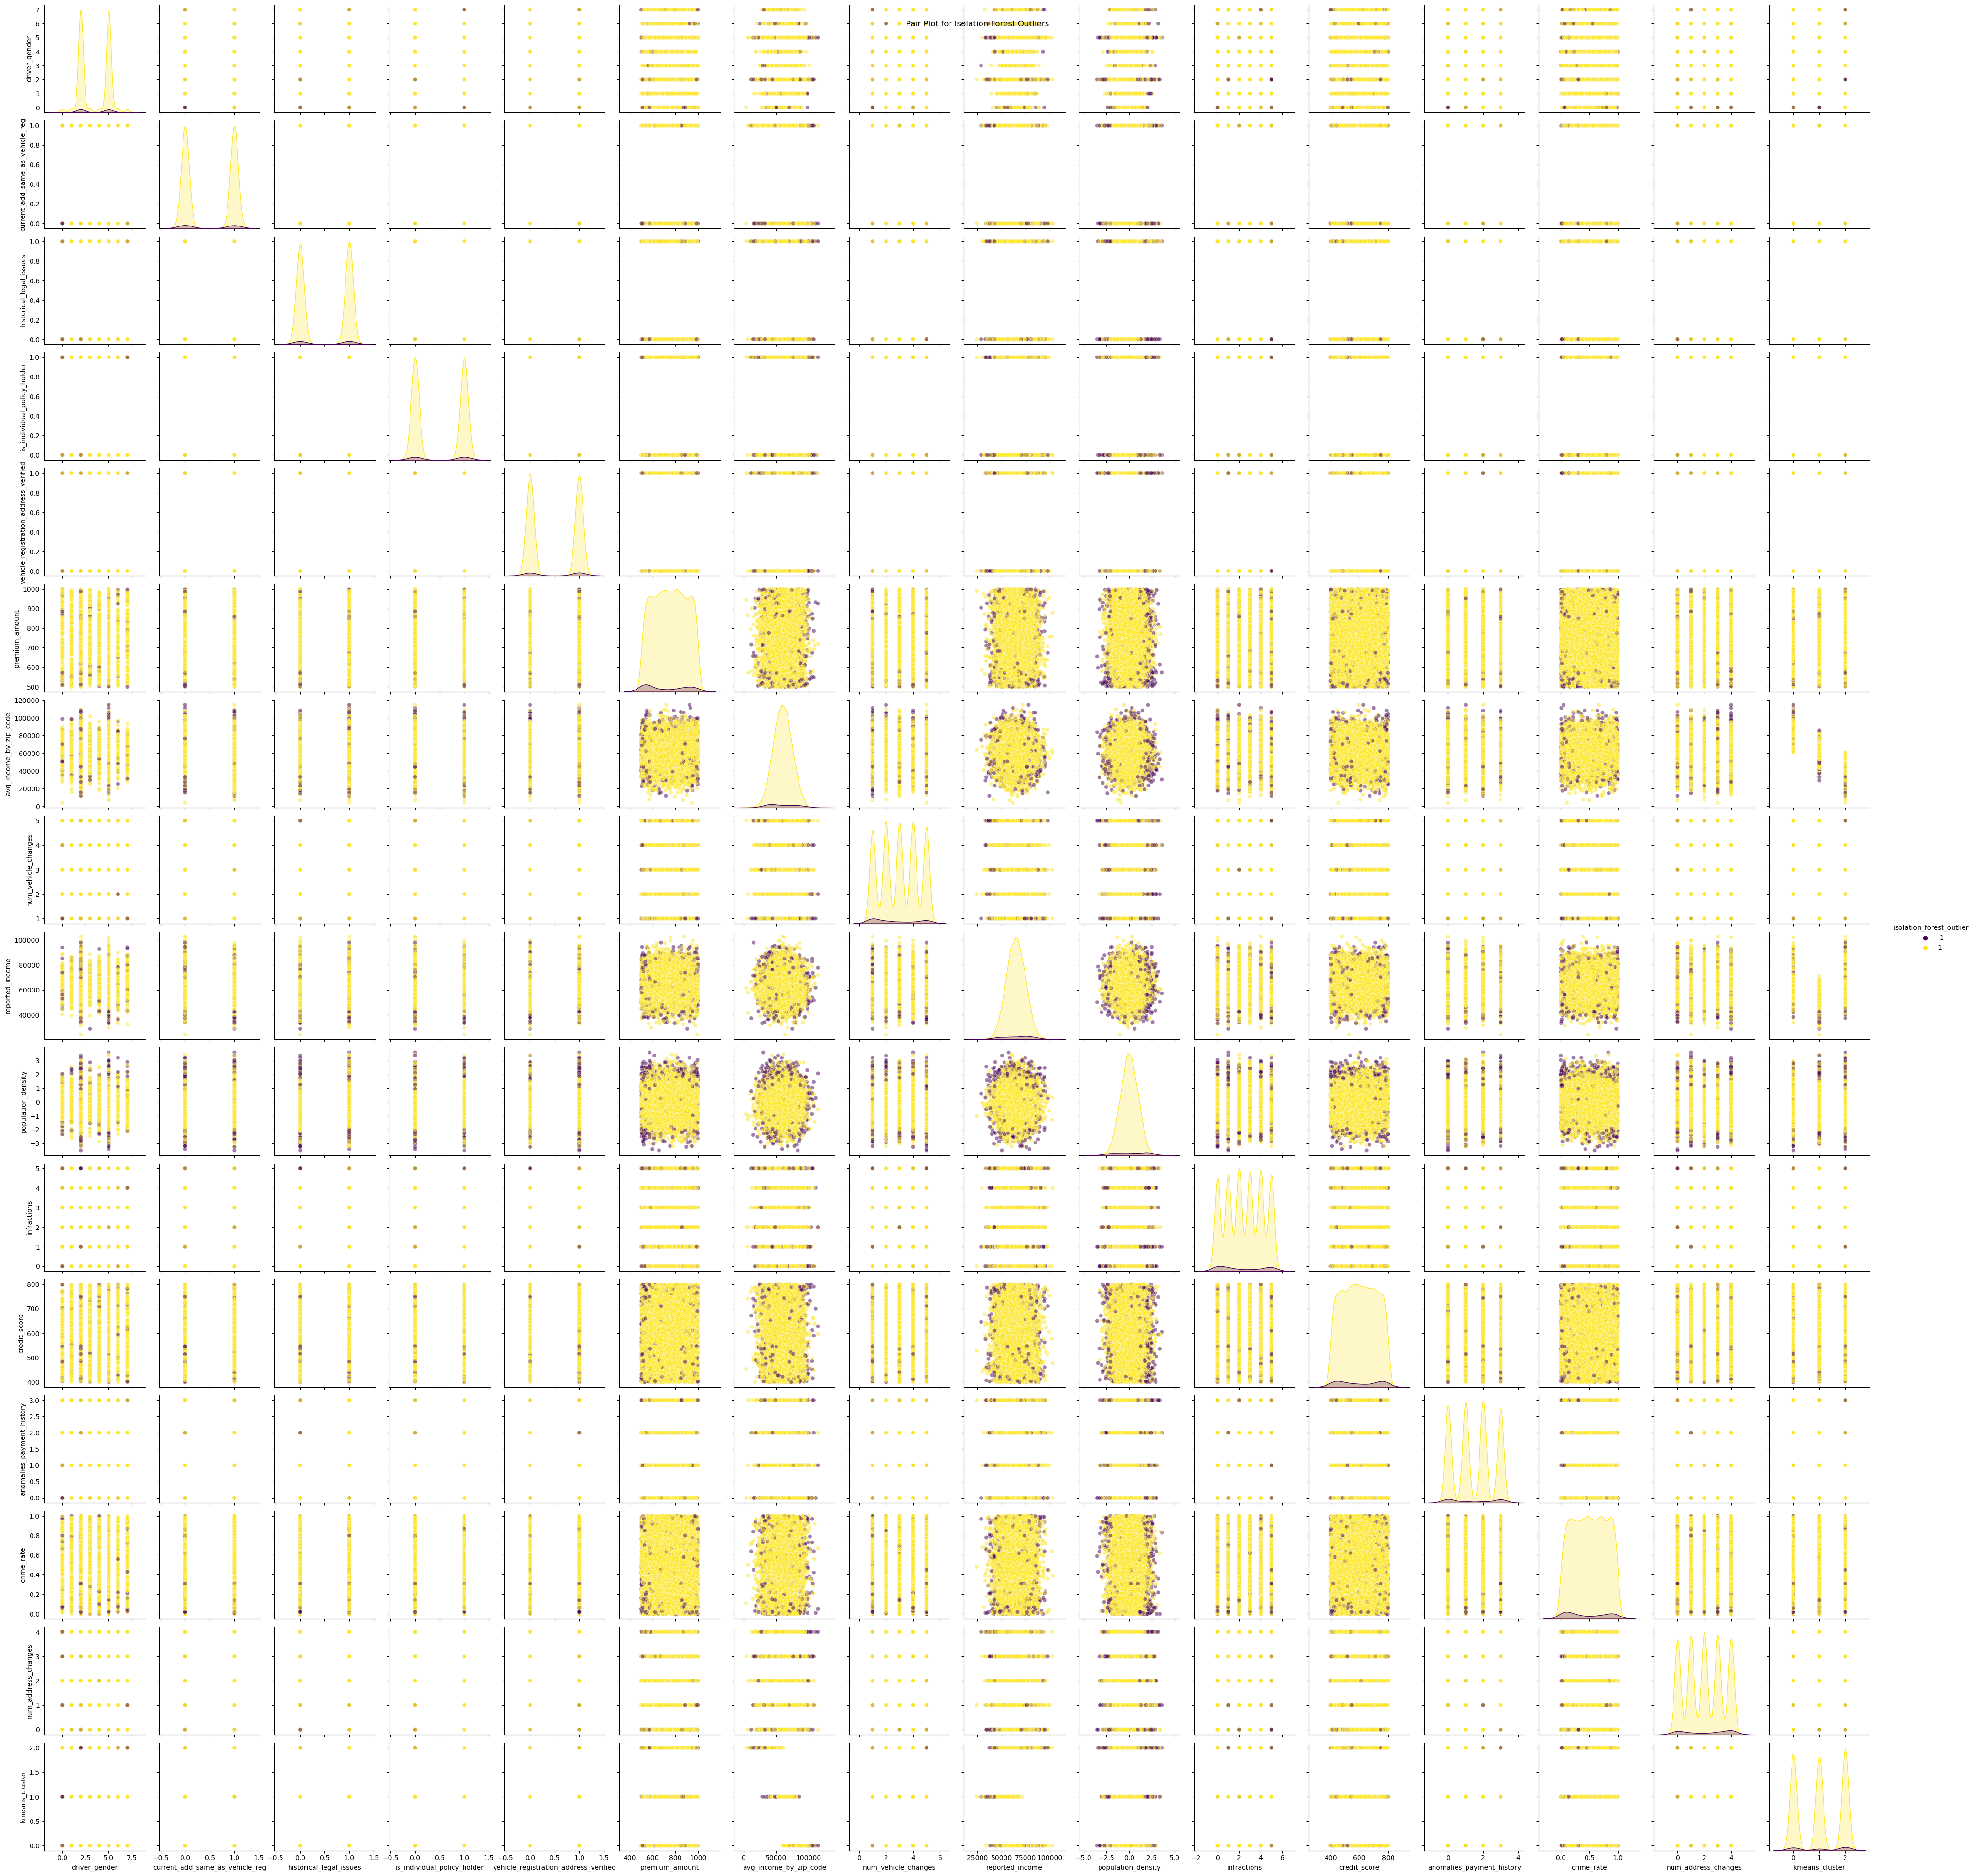

In [11]:
# Plotting pairplot for Isolation Forest outliers
sns.pairplot(selected_data, hue='isolation_forest_outlier', palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot for Isolation Forest Outliers')
plt.show()

Cluster Centroids:
   premium_amount  avg_income_by_zip_code  num_vehicle_changes  \
0      752.793975            75352.257208             3.034108   
1      752.153748            60324.089394             3.010156   
2      748.004140            45911.136912             2.947681   

   reported_income  population_density  infractions  credit_score  \
0     68389.342454            0.018183     2.549653    599.901902   
1     56324.992466           -0.003291     2.481117    600.474135   
2     68850.663051            0.017545     2.492930    598.717195   

   anomalies_payment_history  crime_rate  num_address_changes  
0                   1.462119    0.503109             2.010564  
1                   1.511266    0.506798             2.032053  
2                   1.500283    0.493976             2.003676  


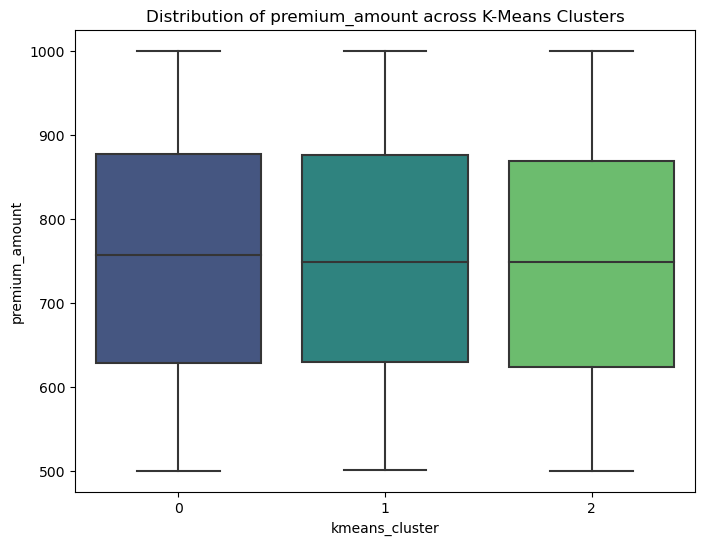

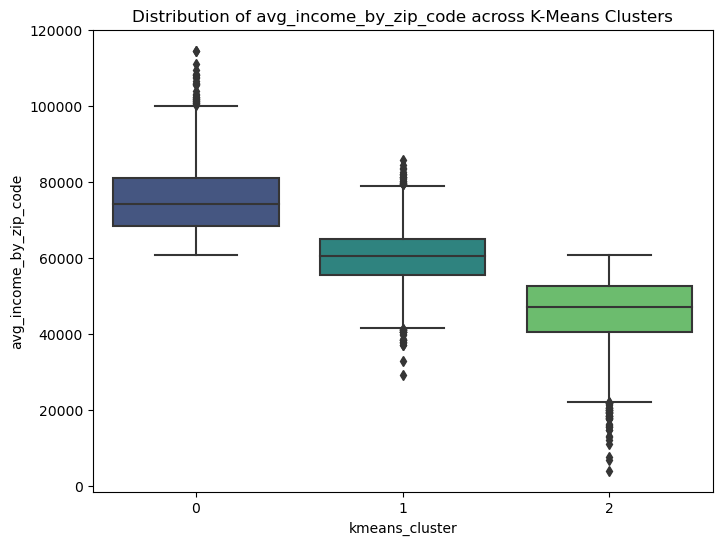

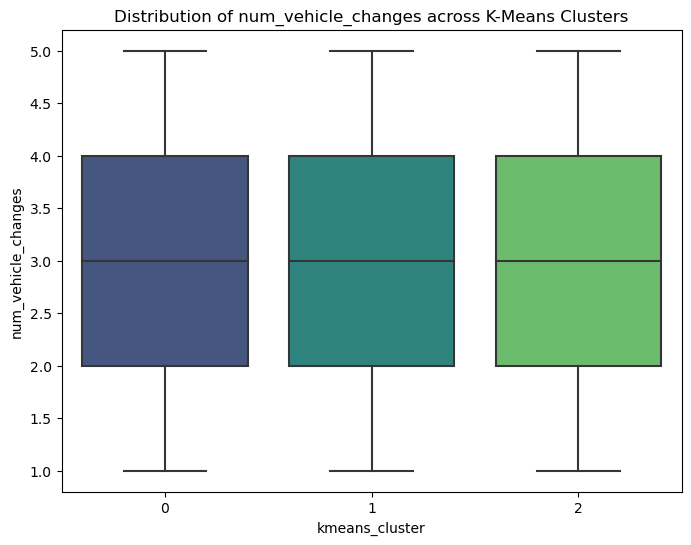

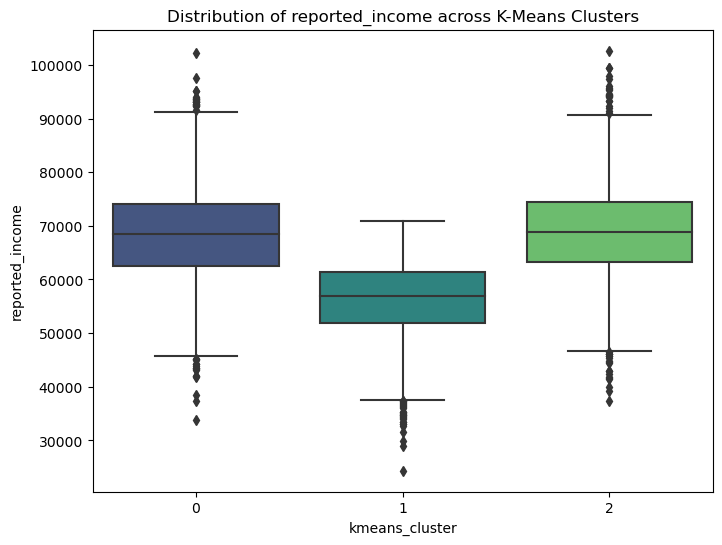

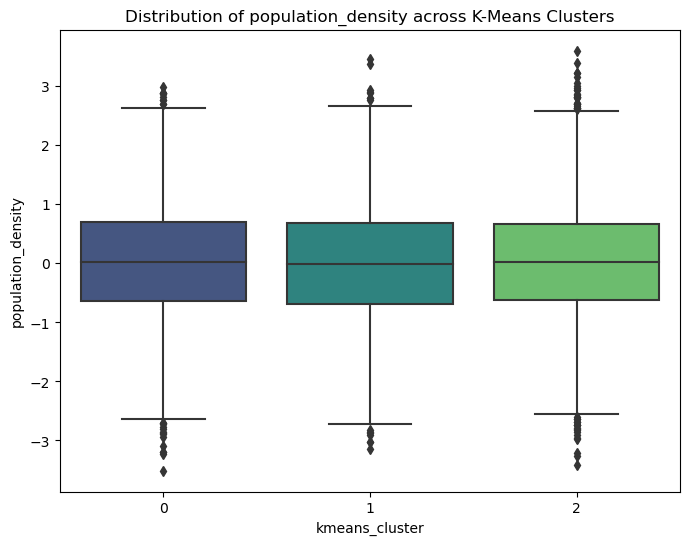

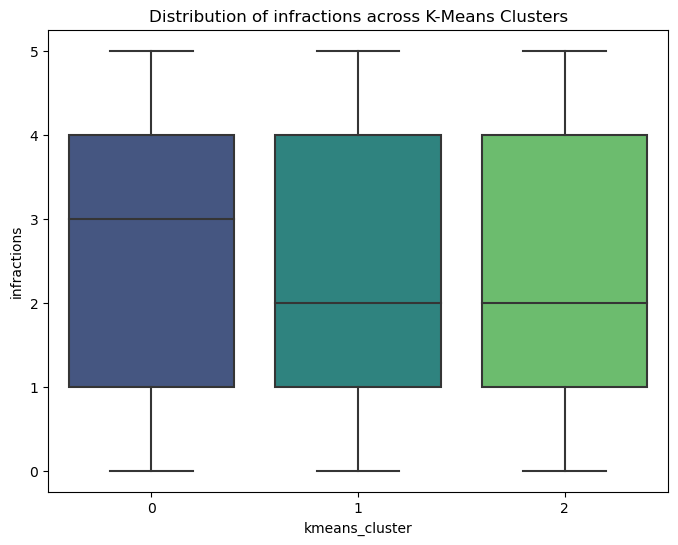

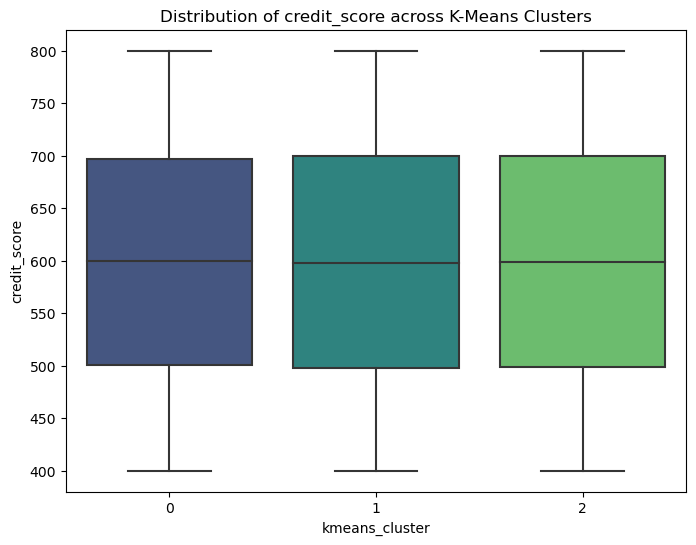

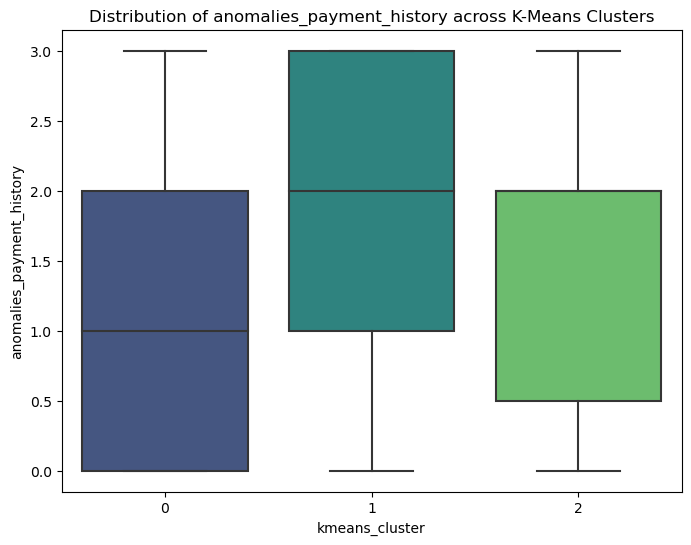

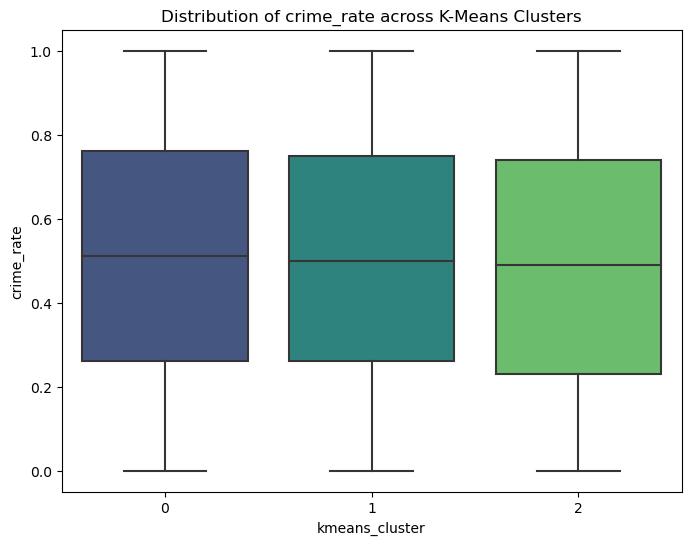

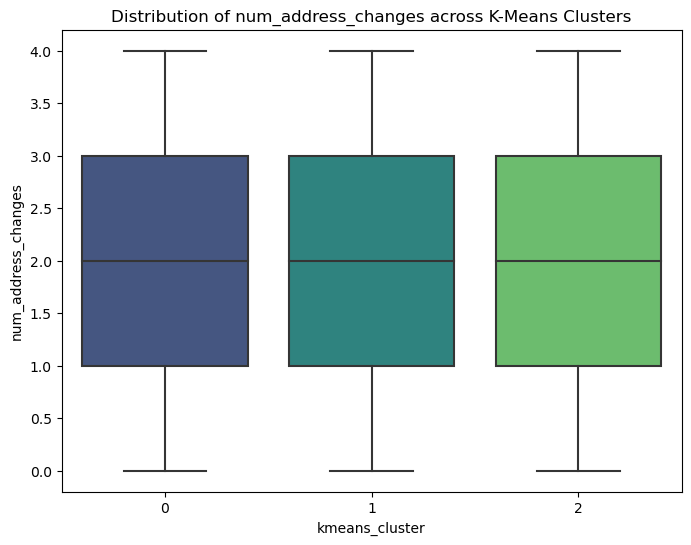

In [12]:
# Analyze cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_vars)
print("Cluster Centroids:")
print(cluster_centroids)

# Visualize distribution using box plots
for feature in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='kmeans_cluster', y=feature, data=selected_data, palette='viridis')
    plt.title(f'Distribution of {feature} across K-Means Clusters')
    plt.show()

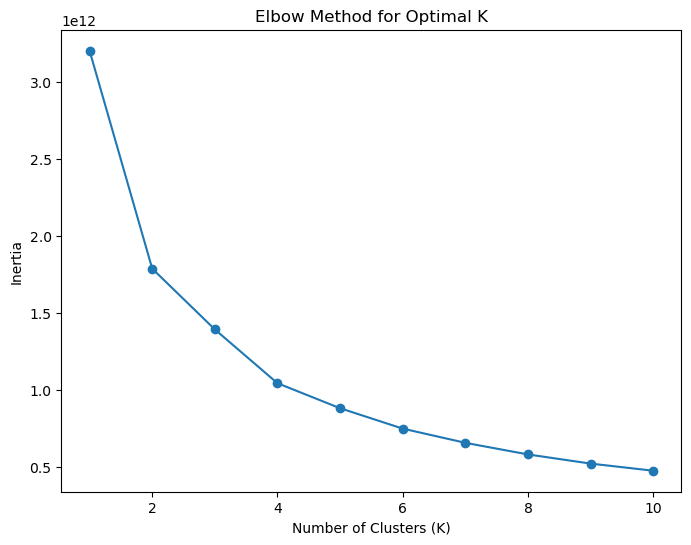

In [15]:
# Elbow Method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_data[numeric_vars])
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

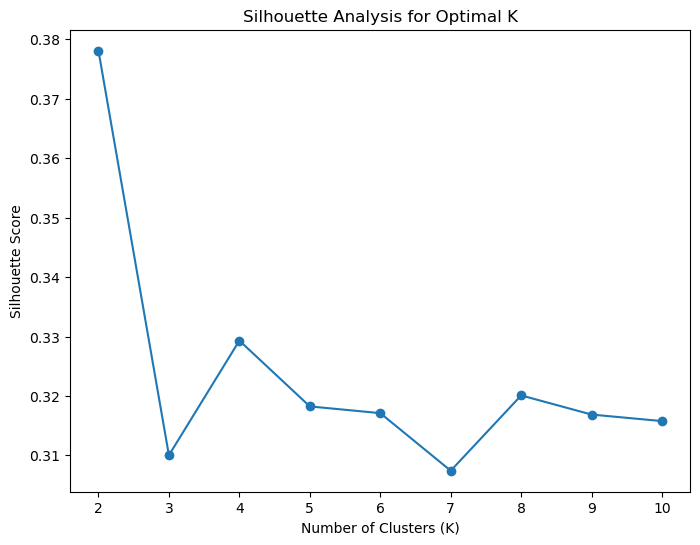

In [16]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_data[numeric_vars])
    silhouette_avg = silhouette_score(selected_data[numeric_vars], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Analysis
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# !pip install --upgrade scikit-learn
# !pip install --upgrade threadpoolctl

In [ ]:
# !pip install scikit-learn threadpoolctl

In [ ]:
# !pip install -U --force-reinstall scikit-learn
